In [1]:
import torch
import torch.nn.init
import torchvision
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=10)

testset  = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=10)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
#GPU
cuda = torch.device('cuda')     # Default CUDA device

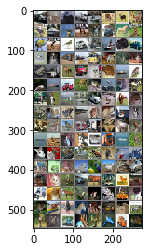

truck deer deertruck


In [4]:
import matplotlib.pylab as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.b1 = nn.BatchNorm2d(24)
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.b2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.b1((self.conv1(x)))))
        x = self.pool(F.relu(self.b2(self.conv2(x))))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
#GPU
net = net.cuda()

net

Net(
  (conv1): Conv2d(3, 24, kernel_size=(5, 5), stride=(1, 1))
  (b1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1600, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [8]:
for epoch in range(10,30):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        #GPU
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 128 == 127:   # print every 2000 mini-batches
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i+ 1, running_loss / 128))
            running_loss = 0.0
    
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        
        #GPU
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        
    print('Accuracy 1000 test images : %d %%'% (100 * correct/total))
    
print('Finished Training')

torch.save(net.state_dict(), 'pkl/CNN_CIFAR-10.pkl')

[11,   128] loss : 0.061
[11,   256] loss : 0.064
[11,   384] loss : 0.106
Accuracy 1000 test images : 66 %
[12,   128] loss : 0.090
[12,   256] loss : 0.076
[12,   384] loss : 0.094
Accuracy 1000 test images : 66 %
[13,   128] loss : 0.073
[13,   256] loss : 0.056
[13,   384] loss : 0.088
Accuracy 1000 test images : 66 %
[14,   128] loss : 0.046
[14,   256] loss : 0.054
[14,   384] loss : 0.071
Accuracy 1000 test images : 66 %
[15,   128] loss : 0.069
[15,   256] loss : 0.089
[15,   384] loss : 0.082
Accuracy 1000 test images : 65 %
[16,   128] loss : 0.053
[16,   256] loss : 0.067
[16,   384] loss : 0.089
Accuracy 1000 test images : 65 %
[17,   128] loss : 0.062
[17,   256] loss : 0.062
[17,   384] loss : 0.065
Accuracy 1000 test images : 66 %
[18,   128] loss : 0.044
[18,   256] loss : 0.051
[18,   384] loss : 0.070
Accuracy 1000 test images : 65 %
[19,   128] loss : 0.072
[19,   256] loss : 0.060
[19,   384] loss : 0.066
Accuracy 1000 test images : 65 %
[20,   128] loss : 0.047
[20

Traceback (most recent call last):
  File "C:\Users\hwnau\.conda\envs\cuda\lib\multiprocessing\queues.py", line 230, in _feed
    close()
  File "C:\Users\hwnau\.conda\envs\cuda\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\hwnau\.conda\envs\cuda\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] 핸들이 잘못되었습니다


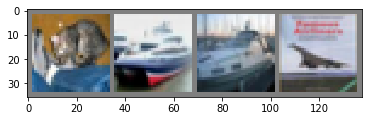

GroundTruth :       cat     ship     ship    plane
Predicted:  :       cat      dog      car    horse


In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ',' '.join('%8s' % classes[labels[j]] for j in range(4)))
print('Predicted:  : ',' '.join('%8s' % classes[predicted[j]] for j in range(4)))

In [25]:
from torch.autograd import Variable

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accurcay to 10000 test images : %d %%' %(100* correct / total))

RuntimeError: Expected object of backend CPU but got backend CUDA for argument #2 'weight'

In [17]:
class_correct = [0. for i in range(10)]
class_total = [0. for i in range(10)]
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        


RuntimeError: Expected object of backend CPU but got backend CUDA for argument #2 'weight'

In [18]:
class_correct

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
classes[1]

'car'

In [20]:
class_correct[2]

0.0

In [21]:
for i in range(10):
    print('Accuray of %s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

ZeroDivisionError: float division by zero